In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Dengue Fever Prediction

File list:
* dengue_features_train.csv
* dengue_features_test.csv
* dengue_labels_train.csv

## Reading files

In [2]:
sub_format = pd.read_csv('submission_format.csv')
sub_format.head()

city  year  weekofyear  total_cases
0   sj  2008          18            0
1   sj  2008          19            0
2   sj  2008          20            0
3   sj  2008          21            0
4   sj  2008          22            0

In [3]:
test_df = pd.read_csv('dengue_features_test.csv')
print(test_df.shape)
test_df.head()

(416, 24)


city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.091200                 78.60             298.492857  ...   
1  0.072314                 12.56             298.475714  ...   
2  0.091529                  3.66             299.455714  ...   
3  0.125686                  0.00             299.690000  ...   
4  0.075914                  0.76             299.780000  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1  

[5 rows x 24 columns]

In [4]:
test_df.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [5]:
train_df = pd.read_csv('dengue_features_train.csv')
print(train_df.shape)
train_df.head()

(1456, 24)


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [6]:
train_df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
train_df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [8]:
train_label = pd.read_csv('dengue_labels_train.csv')
print(train_label.shape)
print(train_label.isnull().sum())
train_label.head()

(1456, 4)
city           0
year           0
weekofyear     0
total_cases    0
dtype: int64


city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

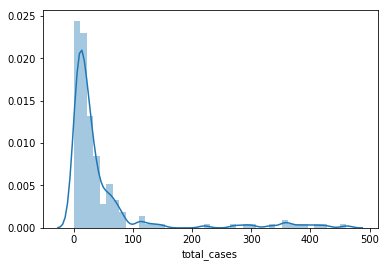

In [62]:
sns.distplot(train_label.loc[train_df['ndvi_ne'].isnull(), 'total_cases'])

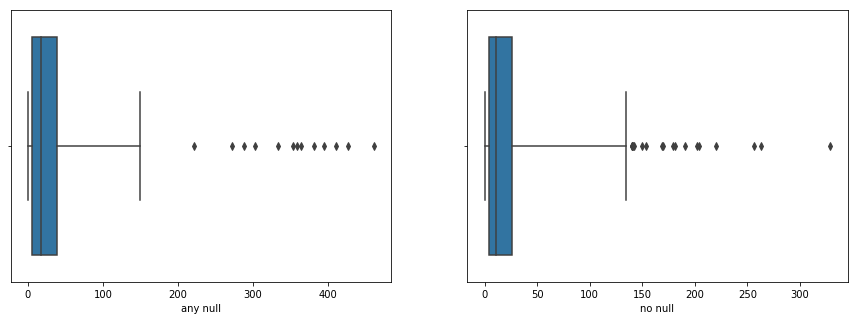

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(train_label.loc[(train_df.isnull().sum(axis=1) > 0), 'total_cases'], whis=5, ax=ax[0])
sns.boxplot(train_label.loc[(train_df.isnull().sum(axis=1) == 0), 'total_cases'], whis=5, ax=ax[1])
ax[0].set_xlabel('any null')
ax[1].set_xlabel('no null')
plt.show()

In [76]:
pd.concat((train_df, train_label['total_cases']), axis=1).loc[train_df.isnull().sum(axis=1) > 0]

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
5      sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
9      sj  1990          27      1990-07-02       NaN  0.121550  0.160683   
13     sj  1990          31      1990-07-30       NaN  0.247150  0.379700   
14     sj  1990          32      1990-08-06       NaN  0.064333  0.164443   
15     sj  1990          33      1990-08-13       NaN  0.128033  0.206957   
24     sj  1990          42      1990-10-15       NaN  0.070200  0.181617   
36     sj  1991           2      1991-01-08       NaN  0.100467  0.251900   
37     sj  1991           3      1991-01-15       NaN  0.293567  0.259943   
42     sj  1991           8      1991-02-19       NaN  0.209400  0.108433   
45     sj  1991          11      1991-03-12       NaN       NaN  0.213250   
51     sj  1991          17      1991-04-23       NaN  0.188450  0.188314   
54     sj  1991          20      1991-05-14       NaN  0.104550  0.151150   
61     sj  1991          27      1991-07-02       NaN  0.177933  0.201529   
62     sj  1991          28      1991-07-09  0.096900       NaN  0.138050   
63     sj  1991          29      1991-07-16       NaN  0.077333  0.099829   
65     sj  1991          31      1991-07-30       NaN       NaN  0.190643   
67     sj  1991          33      1991-08-13  0.059300       NaN  0.155100   
85     sj  1991          51      1991-12-17       NaN  0.046133  0.114400   
87     sj  1992           1      1992-01-01  0.125100  0.157867  0.185283   
91     sj  1992           5      1992-01-29       NaN  0.048300  0.173671   
93     sj  1992           7      1992-02-12       NaN  0.130500  0.195743   
94     sj  1992           8      1992-02-19       NaN  0.184467  0.194614   
95     sj  1992           9      1992-02-26  0.107050  0.081500  0.165243   
96     sj  1992          10      1992-03-04       NaN  0.182180  0.191086   
99     sj  1992          13      1992-03-25       NaN       NaN  0.134843   
108    sj  1992          22      1992-05-27  0.121500       NaN  0.219157   
114    sj  1992          28      1992-07-08       NaN  0.192000  0.146857   
122    sj  1992          36      1992-09-02       NaN  0.217500  0.124014   
137    sj  1992          51      1992-12-16       NaN  0.066425  0.192343   
139    sj  1993          53      1993-01-01       NaN       NaN       NaN   
...   ...   ...         ...             ...       ...       ...       ...   
1170   iq  2005          53      2005-01-01       NaN       NaN       NaN   
1190   iq  2005          20      2005-05-21  0.270086  0.173757  0.210457   
1192   iq  2005          22      2005-06-04  0.378286  0.369371  0.363186   
1203   iq  2005          33      2005-08-20  0.266986  0.293929  0.336000   
1206   iq  2005          36      2005-09-10  0.335429  0.200714  0.322886   
1207   iq  2005          37      2005-09-17  0.239429  0.214871  0.239043   
1209   iq  2005          39      2005-10-01  0.405417  0.428771  0.370600   
1215   iq  2005          45      2005-11-12  0.393800  0.298629  0.401986   
1223   iq  2006           1      2006-01-08  0.199514  0.239343  0.227657   
1225   iq  2006           3      2006-01-22  0.174300  0.133643  0.111757   
1227   iq  2006           5      2006-02-05  0.379114  0.305329  0.345971   
1272   iq  2006          50      2006-12-17  0.378500  0.302033  0.349229   
1273   iq  2006          51      2006-12-24  0.327820  0.261920  0.381467   
1300   iq  2007          27      2007-07-02  0.181443  0.269229  0.193457   
1326   iq  2008           1      2008-01-01  0.191471  0.155414  0.176014   
1329   iq  2008           4      2008-01-22  0.277971  0.324929  0.221914   
1337   iq  2008          12      2008-03-18  0.238333  0.232729  0.123943   
1349   iq  2008          24      2008-06-10  0.293743  0.264367  0.246629   
1350   iq  2008          25      2008-06-17  0.224029  0.175471  0.265657   
1351   iq  2008          26      2008-06-24  0.197043  0.277983  0.213943   
1

## EDA

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_df.drop(['city', 'year', 'week_start_date'], axis=1), 
                                                    train_label['total_cases'], test_size=0.2)

### Y labels

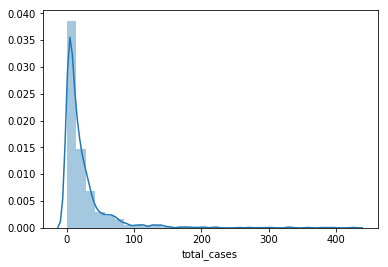

In [10]:
sns.distplot(y_train, bins=30)
plt.show()

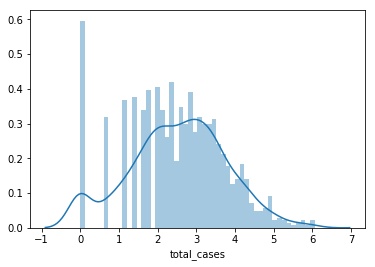

In [11]:
sns.distplot(np.log(y_train+1), bins=50)
plt.show()

In [12]:
from scipy.stats import normaltest
normaltest(np.log(y_train+1))

NormaltestResult(statistic=5.090625609440218, pvalue=0.07844850907842776)

Fail to reject null. Sample is effectively normally distributed.

In [13]:
y_train_log = np.log(y_train+1)
y_test_log = np.log(y_test+1)

### X variables

In [14]:
x_train = x_train.apply(lambda x: x.fillna(x.median()))
x_test = x_test.apply(lambda x: x.fillna(x.median()))

In [15]:
x_train.columns

Index(['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [16]:
pd.concat([x_train, y_train_log], axis=1).corr()['total_cases']

weekofyear                               0.147985
ndvi_ne                                 -0.354009
ndvi_nw                                 -0.321167
ndvi_se                                 -0.273663
ndvi_sw                                 -0.326433
precipitation_amt_mm                    -0.093736
reanalysis_air_temp_k                    0.381265
reanalysis_avg_temp_k                    0.175774
reanalysis_dew_point_temp_k              0.163352
reanalysis_max_air_temp_k               -0.424204
reanalysis_min_air_temp_k                0.553037
reanalysis_precip_amt_kg_per_m2         -0.042596
reanalysis_relative_humidity_percent    -0.254305
reanalysis_sat_precip_amt_mm            -0.093736
reanalysis_specific_humidity_g_per_kg    0.144324
reanalysis_tdtr_k                       -0.526182
station_avg_temp_c                       0.049366
station_diur_temp_rng_c                 -0.453185
station_max_temp_c                      -0.216629
station_min_temp_c                       0.386253


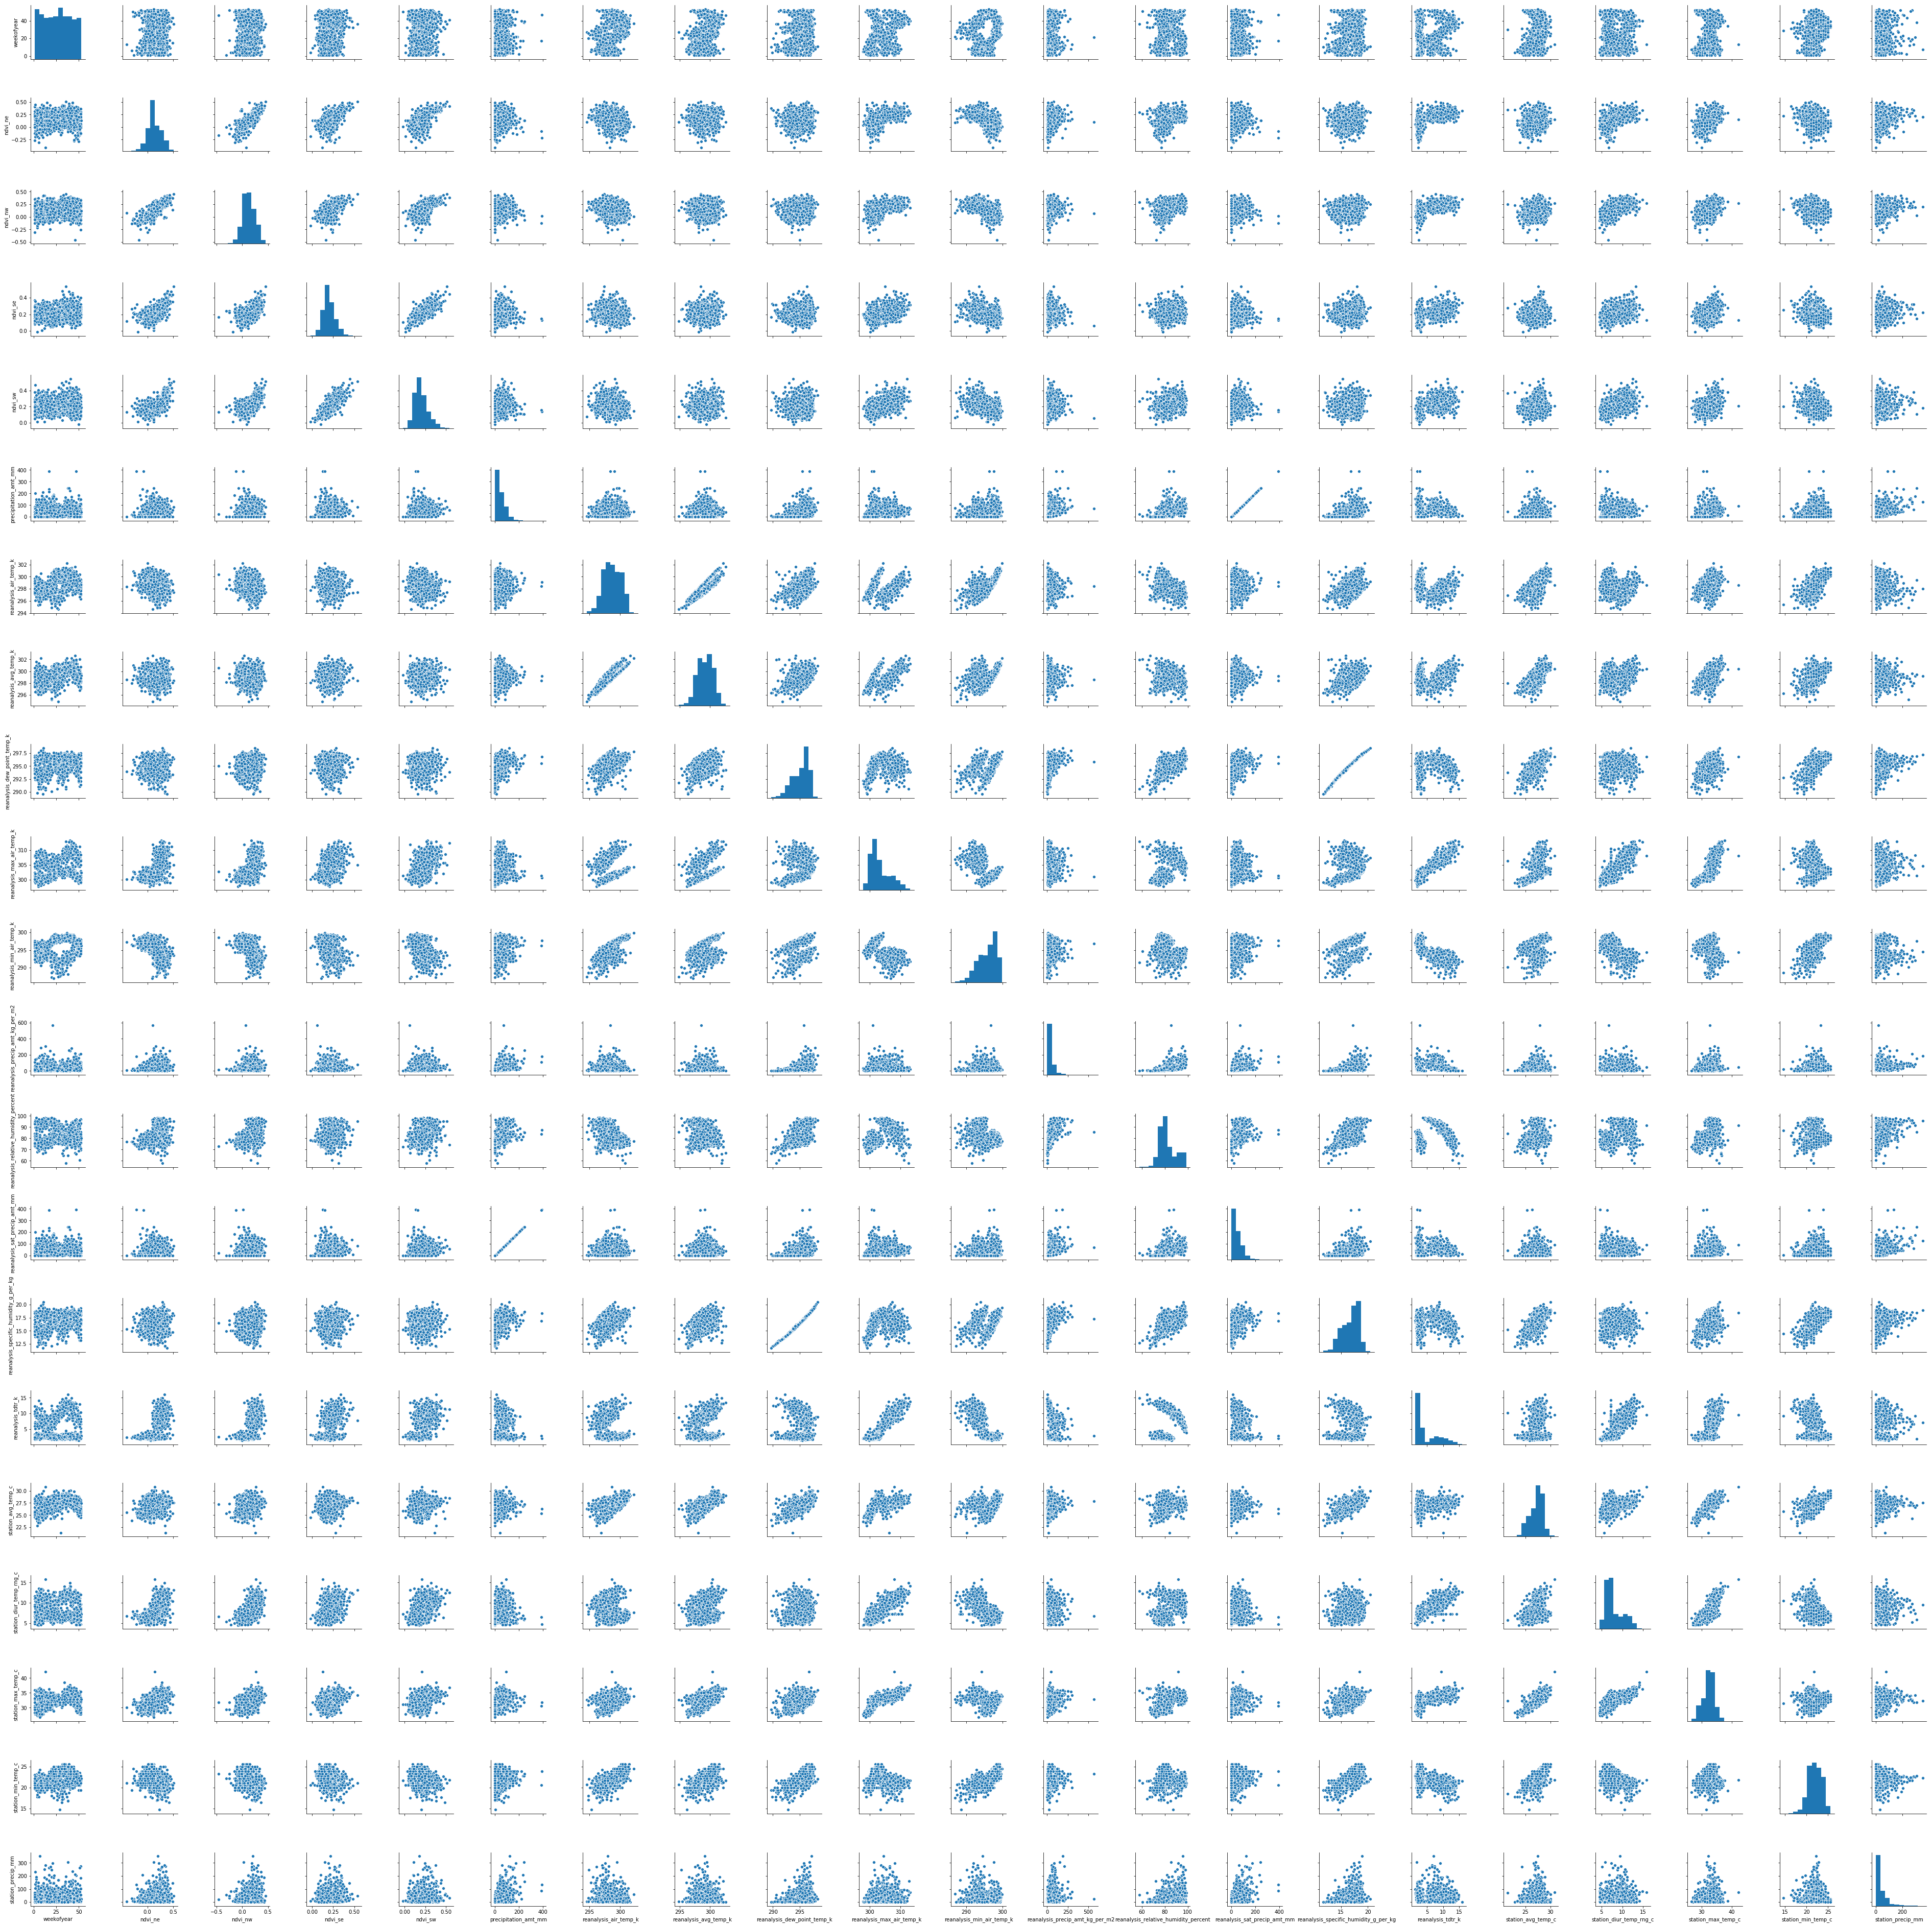

In [36]:
sns.pairplot(x_train)
plt.show()

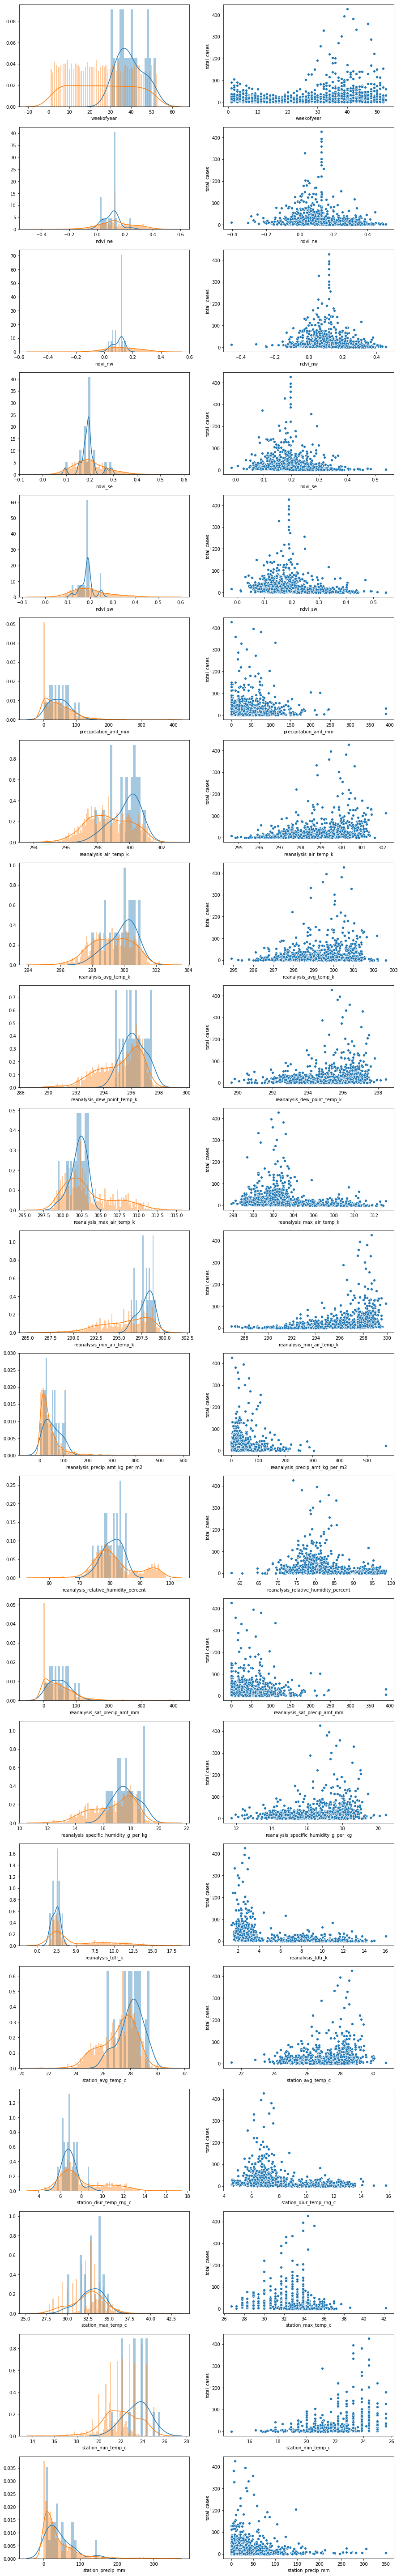

In [81]:
mask = y_train > 150
f, ax = plt.subplots(len(x_train.columns), 2, figsize=(15, 5*len(x_train.columns)))
for i, col in enumerate(x_train.columns):
    sns.distplot(x_train.loc[mask, col], bins=20, ax=ax[i, 0])
    sns.distplot(x_train.loc[~mask, col], bins=100, ax=ax[i, 0])
    sns.scatterplot(x_train[col], y_train, ax=ax[i, 1])
plt.show()

In [18]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

norm = QuantileTransformer(output_distribution='normal')

x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, whiten=True)

x_train_pca = pca.fit_transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)

## Model

In [20]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 
#          'min_samples_split': [0.05, 0.1, 0.15, 0.2], 
#          'n_estimators': [50, 100, 200]}

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

# model = RandomForestRegressor(n_estimators=200, max_depth=3)
# model = GradientBoostingRegressor(n_estimators=200, max_depth=3)
model = Ridge(alpha=1.0)

grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_absolute_error', return_train_score=True)

grid.fit(x_train_norm, y_train_log)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [21]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001999  8.167296e-04         0.000333        0.000471      0.0001   
1       0.001994  8.096320e-04         0.000671        0.000475       0.001   
2       0.001332  4.698532e-04         0.000666        0.000471        0.01   
3       0.001333  4.715390e-04         0.000333        0.000471         0.1   
4       0.001332  4.711456e-04         0.000333        0.000471           1   
5       0.000999  1.946680e-07         0.000333        0.000471          10   
6       0.001999  4.899036e-07         0.000333        0.000471         100   
7       0.001666  4.709772e-04         0.000666        0.000471        1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.794836          -0.794836          -0.811490   
1   {'alpha': 0.001}          -0.794830          -0.794835          -0.811495   
2    {'alpha': 0.01}          -0.794776          -0.794833          -0.811550   
3     {'alpha': 0.1}          -0.794289          -0.794808          -0.812041   
4     {'alpha': 1.0}          -0.793115          -0.795046          -0.814674   
5    {'alpha': 10.0}          -0.795140          -0.794703          -0.815639   
6   {'alpha': 100.0}          -0.803386          -0.796488          -0.818869   
7  {'alpha': 1000.0}          -0.829499          -0.812485          -0.840543   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.800387        0.007851                4           -0.782106   
1        -0.800387        0.007855                3           -0.782105   
2        -0.800386        0.007894                2           -0.782089   
3        -0.800379        0.008249                1           -0.781975   
4        -0.800945        0.009740                5           -0.782573   
5        -0.801827        0.009768                6           -0.785534   
6        -0.806248        0.009358                7           -0.792872   
7        -0.827509        0.011541                8           -0.820048   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0           -0.790631           -0.781869         -0.784869         0.004076  
1           -0.790632           -0.781869         -0.784869         0.004076  
2           -0.790639           -0.781871         -0.784866         0.004083  
3           -0.790729           -0.781882         -0.784862         0.004149  
4           -0.791488           -0.782119         -0.785393         0.004313  
5           -0.793844           -0.783853         -0.787744         0.004368  
6           -0.802011           -0.792975         -0.795953         0.004284  
7           -0.829348           -0.817089         -0.822162         0.005223

In [22]:
grid.best_params_

{'alpha': 0.1}

## Evaluation

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

y_train_pred = np.exp(grid.predict(x_train_norm))-1
y_test_pred = np.exp(grid.predict(x_test_norm))-1
train_residual = y_train - y_train_pred
test_residual = y_test - y_test_pred
mean_train_error = mean_absolute_error(y_train, y_train_pred)
mean_test_error = mean_absolute_error(y_test, y_test_pred)

Train R2: 0.064 
Test R2: 0.047


Mean train error: 17.215 
Mean test error: 17.128


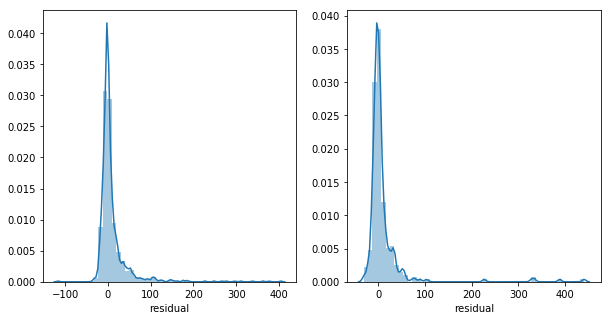

In [35]:
print('Mean train error: {:.3f} \nMean test error: {:.3f}'.format(mean_train_error, mean_test_error))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(train_residual, bins=50, ax=ax[0])
sns.distplot(test_residual, bins=50, ax=ax[1])
ax[0].set_xlabel('residual')
ax[1].set_xlabel('residual')
plt.show()

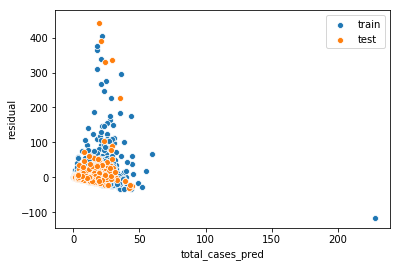

In [25]:
sns.scatterplot(y_train_pred, train_residual, label='train')
sns.scatterplot(y_test_pred, test_residual, label='test')
plt.xlabel('total_cases_pred')
plt.ylabel('residual')
plt.legend()
plt.show()

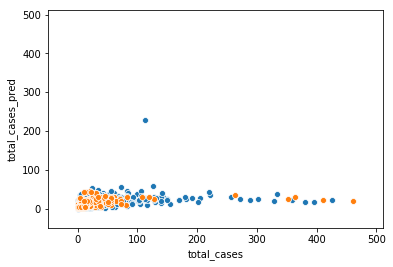

In [26]:
max_axis = max(y_test.max(), y_test_pred.max(), y_train.max(), y_train_pred.max()) + 50
min_axis = min(y_test.min(), y_test_pred.min(), y_train.min(), y_train_pred.min()) - 50
sns.scatterplot(y_train, y_train_pred)
sns.scatterplot(y_test, y_test_pred)
plt.xlim(min_axis, max_axis)
plt.ylim(min_axis, max_axis)
plt.ylabel('total_cases_pred')
plt.show()